In [1]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.utils.data
from PIL import Image
from glob import glob
import torch.nn as nn
import pandas as pd
import numpy as np
import torch
import cv2
import os


from visualization import *
from architecture import *
from Evaluation import *
from Train import *
from data import *

In [1]:
""" 40 Attributes
00 - 5_o_Clock_Shadow
01 - Arched_Eyebrows
02 - Attractive 
03 - Bags_Under_Eyes
04 - Bald
05 - Bangs
06 - Big_Lips
07 - Big_Nose
08 - Black_Hair
09 - Blond_Hair
10 - Blurry 
11 - Brown_Hair 
12 - Bushy_Eyebrows 
13 - Chubby 
14 - Double_Chin 
15 - Eyeglasses 
16 - Goatee 
17 - Gray_Hair 
18 - Heavy_Makeup 
19 - High_Cheekbones 
20 - Male 
21 - Mouth_Slightly_Open 
22 - Mustache 
23 - Narrow_Eyes 
24 - No_Beard 
25 - Oval_Face 
26 - Pale_Skin 
27 - Pointy_Nose 
28 - Receding_Hairline 
29 - Rosy_Cheeks 
30 - Sideburns 
31 - Smiling 
32 - Straight_Hair 
33 - Wavy_Hair 
34 - Wearing_Earrings 
35 - Wearing_Hat 
36 - Wearing_Lipstick 
37 - Wearing_Necklace 
38 - Wearing_Necktie 
39 - Young         
"""

' 40 Attributes\n00 - 5_o_Clock_Shadow\n01 - Arched_Eyebrows\n02 - Attractive \n03 - Bags_Under_Eyes\n04 - Bald\n05 - Bangs\n06 - Big_Lips\n07 - Big_Nose\n08 - Black_Hair\n09 - Blond_Hair\n10 - Blurry \n11 - Brown_Hair \n12 - Bushy_Eyebrows \n13 - Chubby \n14 - Double_Chin \n15 - Eyeglasses \n16 - Goatee \n17 - Gray_Hair \n18 - Heavy_Makeup \n19 - High_Cheekbones \n20 - Male \n21 - Mouth_Slightly_Open \n22 - Mustache \n23 - Narrow_Eyes \n24 - No_Beard \n25 - Oval_Face \n26 - Pale_Skin \n27 - Pointy_Nose \n28 - Receding_Hairline \n29 - Rosy_Cheeks \n30 - Sideburns \n31 - Smiling \n32 - Straight_Hair \n33 - Wavy_Hair \n34 - Wearing_Earrings \n35 - Wearing_Hat \n36 - Wearing_Lipstick \n37 - Wearing_Necklace \n38 - Wearing_Necktie \n39 - Young         \n'

In [2]:
attributes_names = np.array(['Smiling'])

train_set, test_set, val_set = split_train_val_test(attributes_names)

print(len(test_set), len(train_set), len(val_set))
print(len(test_set)+ len(train_set)+ len(val_set))

19867 162770 19962
202599


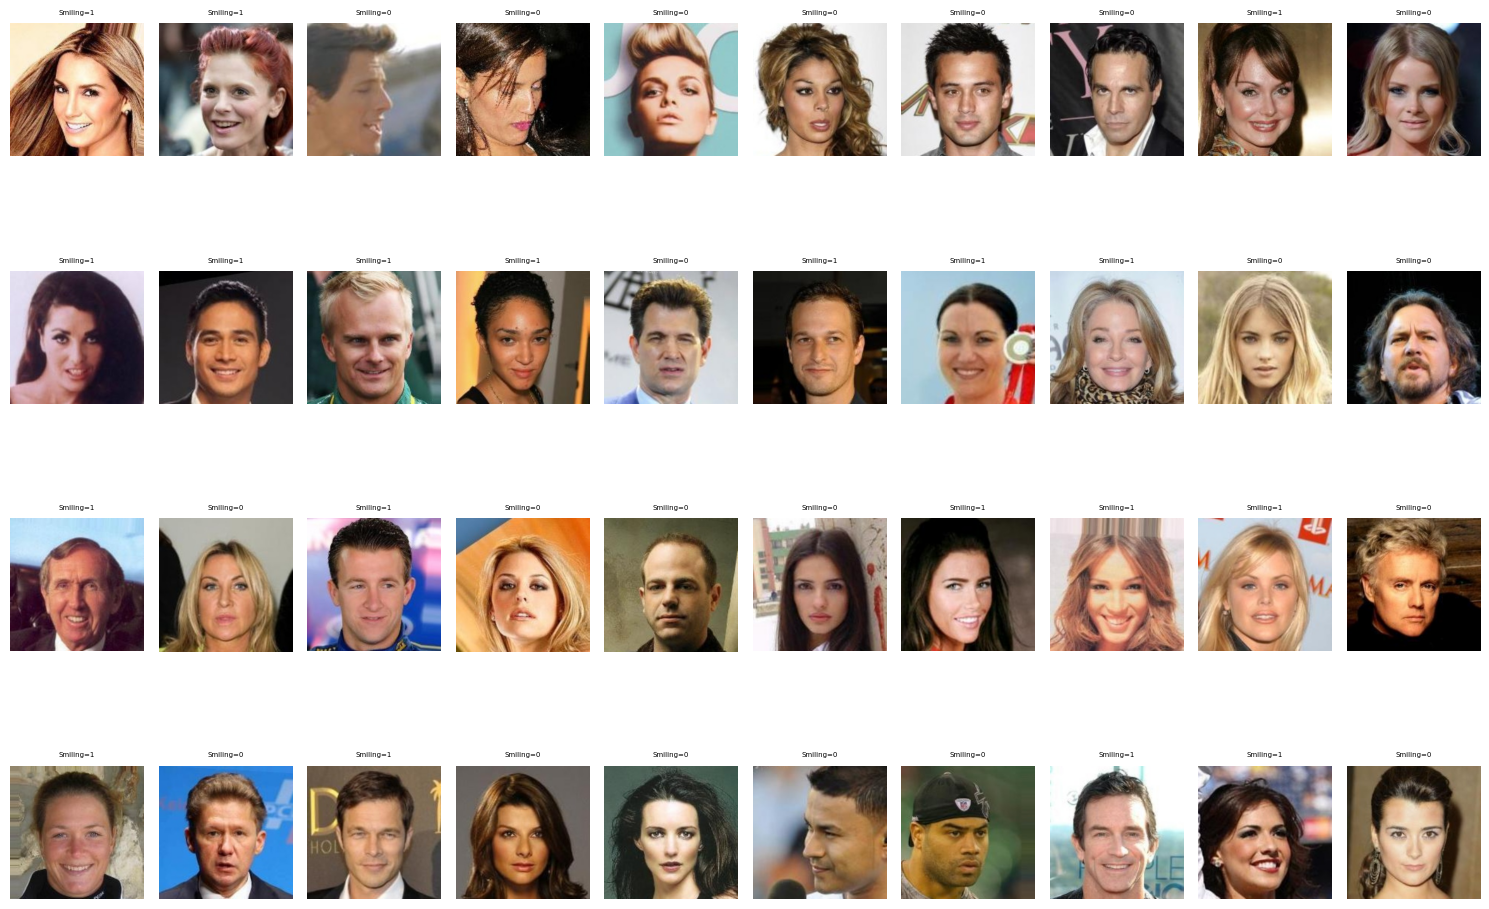

In [3]:
show_images_attributes_celaba(train_set, attributes_names, 40 )

In [4]:
batch_size = 32

train_data = DataLoader(train_set, 
                    batch_size=batch_size, shuffle=True, num_workers=1, drop_last=False)
test_data  = DataLoader(test_set, 
                    batch_size=batch_size, shuffle=True, num_workers=1, drop_last=False)
val_data   = DataLoader(val_set, 
                    batch_size=batch_size, shuffle=True, num_workers=1, drop_last=False)

In [5]:
Enc = Encoder()
image_size = 256
x = Variable(torch.zeros(32, 3, image_size, image_size))
Ex = Enc(x)
print(Ex.size())

Dis = Discriminator(10)
p = Dis(Ex)
print(p.size())

Dec = Decoder(20)
attrs = torch.zeros(32, 1)
x_ = Dec(Ex, attrs)
print(x_.size())

torch.Size([32, 512, 2, 2])
torch.Size([32, 10])
torch.Size([32, 3, 256, 256])


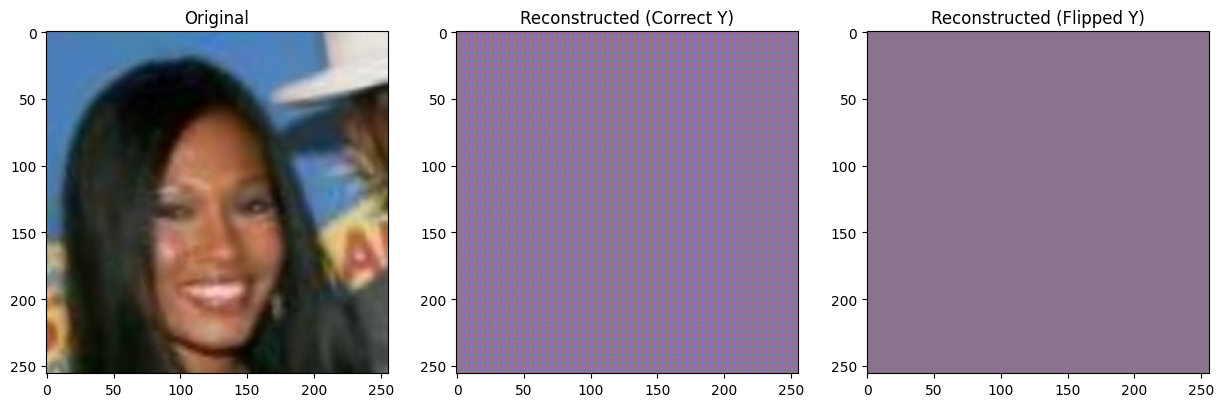

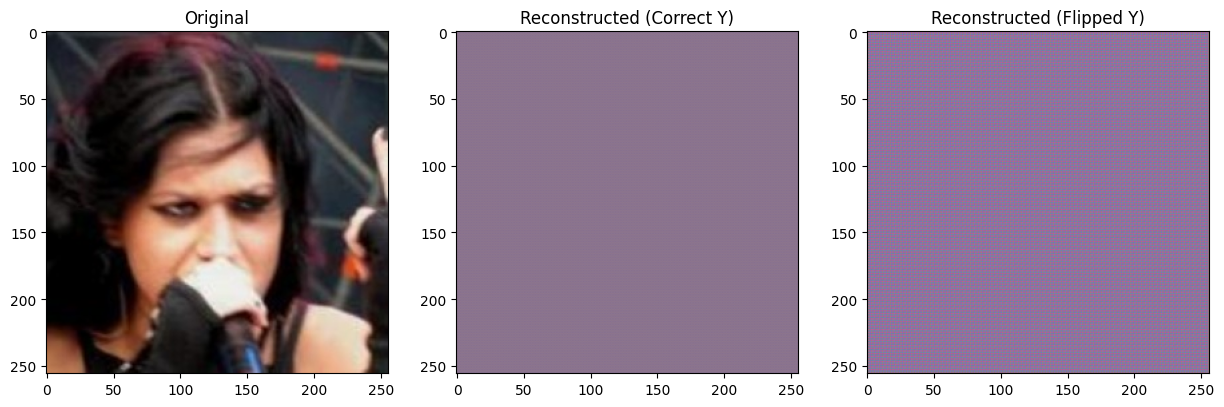

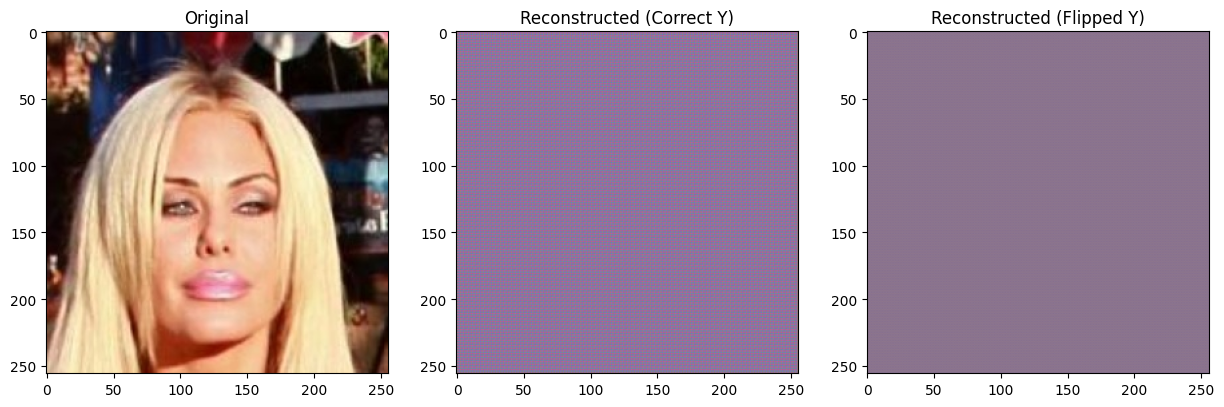

KeyboardInterrupt: 

In [6]:
encoder = Encoder()
decoder = Decoder(1)
descrim = Discriminator(1)

trainer = Evaluation(encoder,decoder, descrim, train_data, val_data, 32)

for n_epoch in range(100):
        #trainer.descriminator_train()
        #trainer.autoencoder_train()
        trainer.evaluation(n_epoch)

In [5]:
train_set = Datasets(
    root_images='.\data\img_align_celeba_Preprocessed', 
    root_attributes='.\data\processed_attributes',
    attributes=attributes_names,
    chunk='train'
)

train_data = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=False)

to_swap = np.random.choice(train_set.attr_labels)
swap_idx, = np.where(train_set.attr_labels == to_swap)[0]


ValueError: a must be 1-dimensional

In [ ]:
### Save model
encoder_fpath = ''
decoder_fpath = ''
discriminator_fpath = ''

print('Saving encoder/decoder parameters to %s' % (encoder_fpath))
torch.save(encoder.state_dict(), encoder_fpath)
print('Saving encoder/decoder parameters to %s' % (decoder_fpath))
torch.save(decoder.state_dict(), encoder_fpath)
print('Saving discriminator parameters to %s' % (discriminator_fpath))
torch.save(descrim.state_dict(), discriminator_fpath)